In [28]:
from dishonest_casino import dishonest_casino_play
import numpy as np
import matplotlib.pyplot as plt

% matplotlib inline

In [37]:
fair_prob = [1./6, 1./6, 1./6, 1./6, 1./6, 1./6]
unfair_prob = [1./10, 1./10, 1./10, 1./10, 1./10, 1./2]
switch_to_loaded_dice_prob = 0.05
switch_to_fair_dice_prob = 0.1
n = 200

In [38]:
h, v = dishonest_casino_play(n=n, fair_prob=fair_prob, unfair_prob=unfair_prob,
                             prob_switch_to_unfair=switch_to_loaded_dice_prob,
                             prob_switch_to_fair=switch_to_fair_dice_prob)

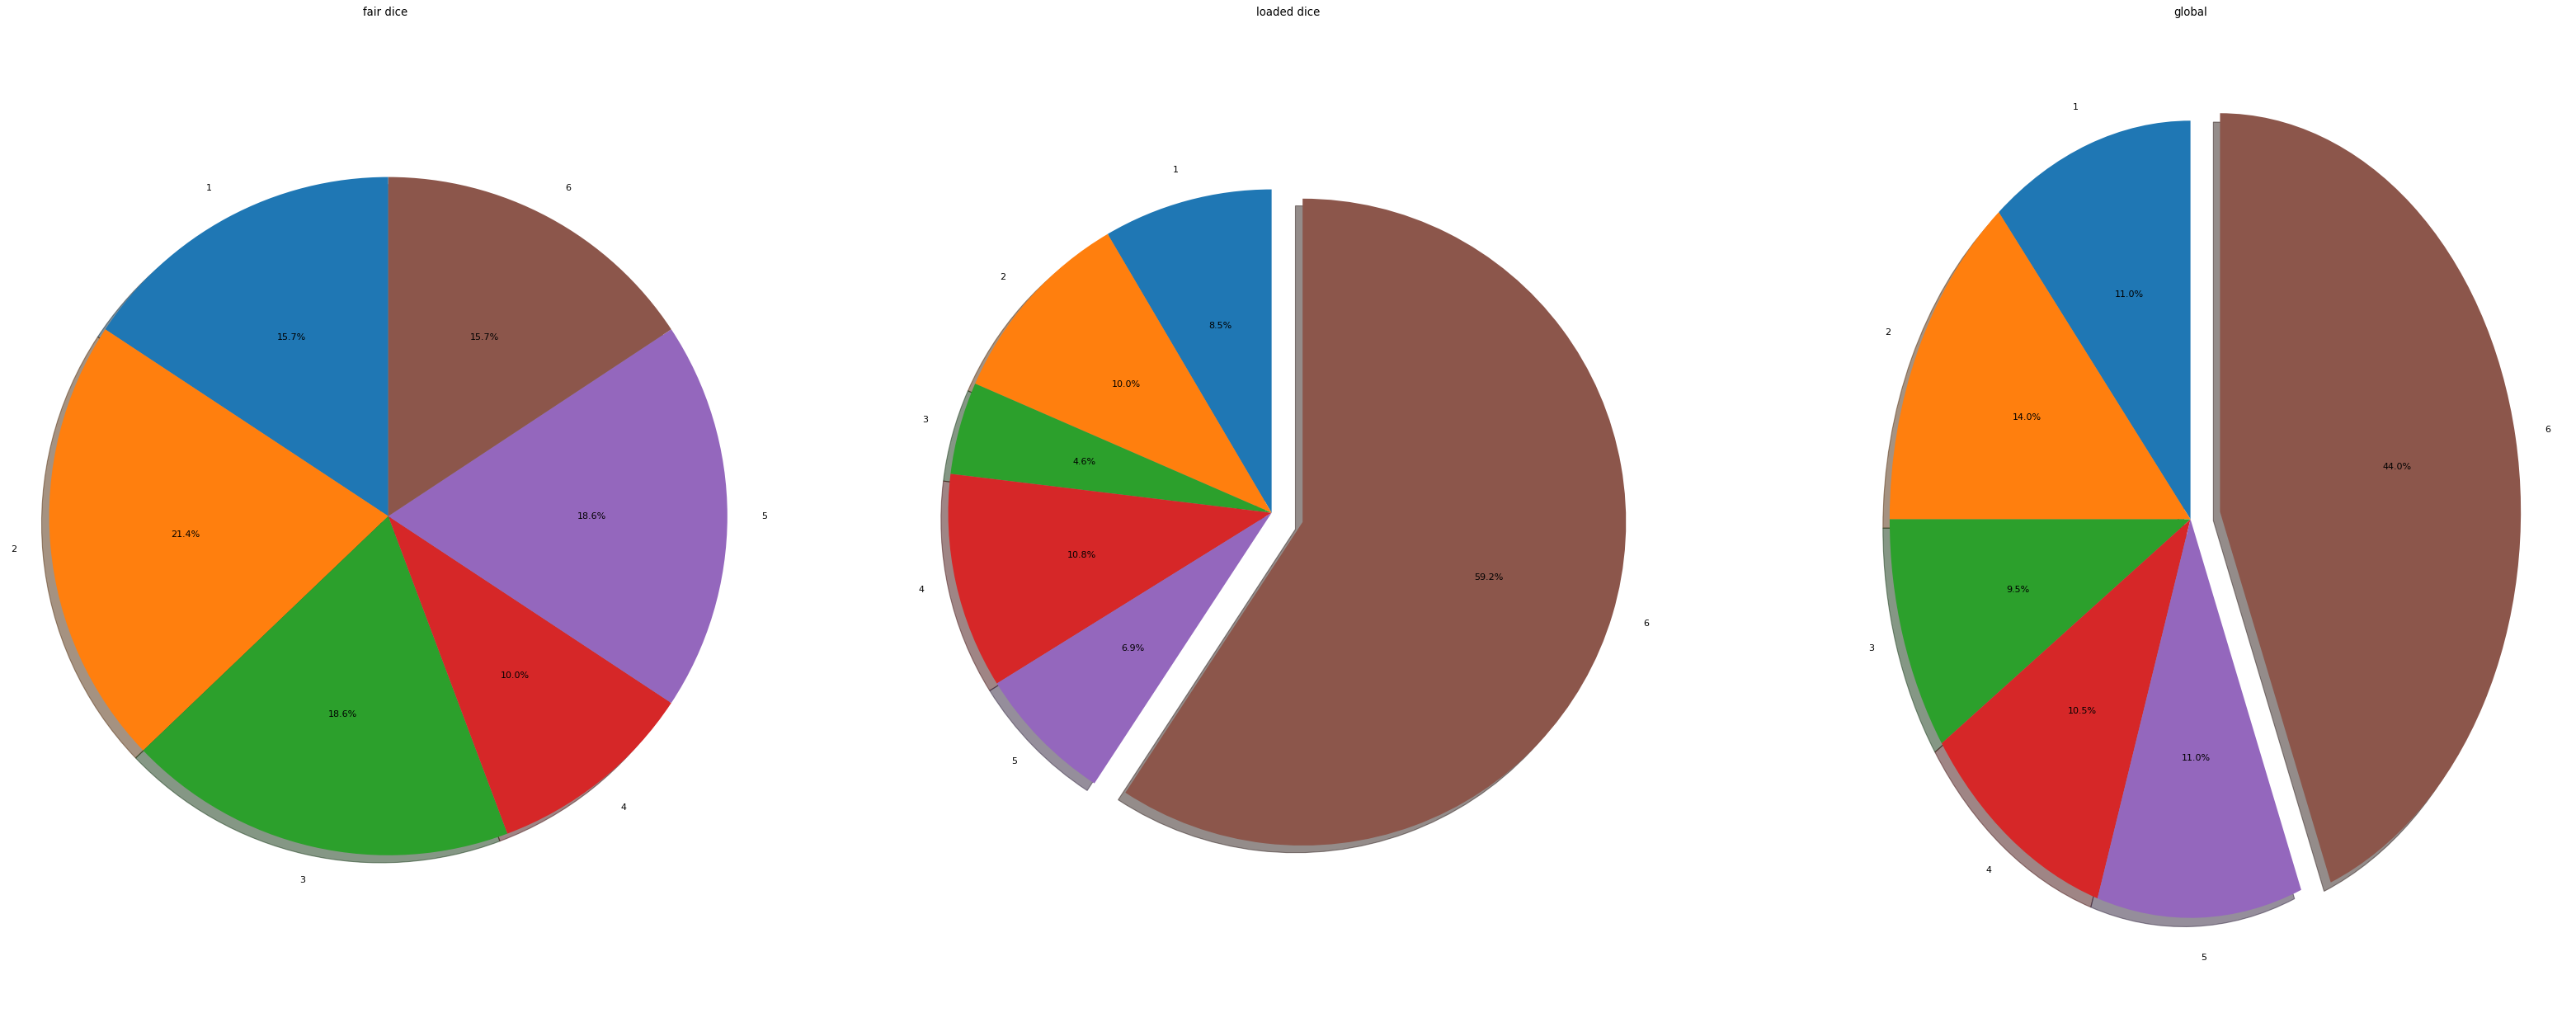

In [39]:
x = np.arange(1, len(h) + 1, 1)
v = np.array(v)
h = np.array(h)

possible_values = [1, 2, 3, 4, 5, 6]
values_fair_dice = v[h==0]
freq_fair_dice = [sum(values_fair_dice==i) for i in possible_values]
values_loaded_dice = v[h==1]
freq_loaded_dice = [sum(values_loaded_dice==i) for i in possible_values]
freq_global = [sum(v == i) for i in possible_values]

values = [1, 2, 3, 4, 5, 6]
explode = (0, 0, 0, 0, 0, 0.1)

fig = plt.figure(figsize=(50, 20), dpi= 80, facecolor='w', edgecolor='k')
ax1 = fig.add_subplot(131)
ax1.pie(freq_fair_dice, labels=values, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("fair dice")

#explode = (0, 0.1) 
ax2 = fig.add_subplot(132)
ax2.pie(freq_loaded_dice, explode=explode, labels=values, autopct='%1.1f%%', 
        shadow=True, startangle=90)
ax2.axis('equal')
ax2.set_title("loaded dice")

ax3 = fig.add_subplot(133)
ax3.pie(freq_global, explode=explode, labels=values, autopct='%1.1f%%', 
        shadow=True, startangle=90)
ax3.set_title("global")

plt.show()

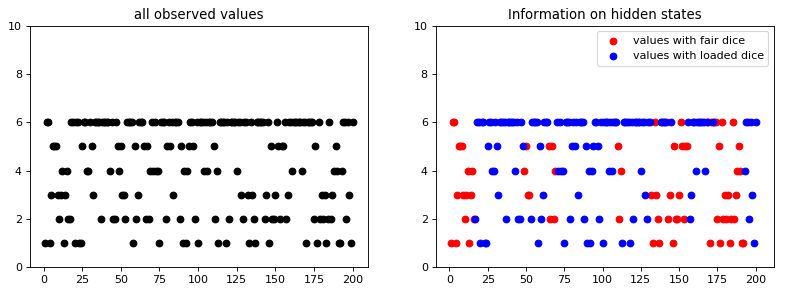

In [40]:
fig = plt.figure(figsize=(12, 4), dpi= 80, facecolor='w', edgecolor='k')
ax1 = fig.add_subplot(121)
ax1.scatter(x, v, color='k', label='observed values')
ax1.set_title('all observed values')
ax1.set_ylim(0, 10)
ax2 = fig.add_subplot(122)
ax2.scatter(x[h==0], v[h==0], color='r', label='values with fair dice')
ax2.scatter(x[h==1], v[h==1], color='b', label='values with loaded dice')
ax2.set_ylim(0, 10)
ax2.set_title('Information on hidden states')
plt.legend(loc='best')
plt.show()

## Recovering the hidden states using viterbi's algorithm

We are going to recover the most likely hidden path using the viterbi's algorithm

In [41]:
from math import log

def viterbi(obs_states, hidden_states, init_prob, trans_prob, emis_prob):
    d_viterbi = []
    # Initialisation
    log_probabilities = [log(init_prob[k]) + log(emis_prob[k][obs_states[0]]) for k in hidden_states]
    previous_state = None
    d_viterbi.append({"log_prob": log_probabilities, "prev_s" : previous_state})
    # Do Viterbi
    for i in range(1, len(obs_states)):
        log_probabilities = []
        previous_state = []
        for l in hidden_states:
            trans_prob_to_l = [d_viterbi[i-1]["log_prob"][k] +\
                                log(trans_prob[k][l]) for k in hidden_states]
            max_log_prob = max(trans_prob_to_l)
            log_probabilities.append(max_log_prob + log(emis_prob[l][obs_states[i]]))
            previous_state.append(trans_prob_to_l.index(max_log_prob))
        d_viterbi.append({"log_prob": log_probabilities, "prev_s": previous_state})
    # Last state
    last_prob = max(d_viterbi[-1]["log_prob"])
    last_state = d_viterbi[-1]["log_prob"].index(last_prob)
    # Tracing back
    h_states = [0 for i in range(len(obs_states))]
    h_states[-1] = last_state
    for i in range(1, len(obs_states)):
        prev_state = d_viterbi[-i]["prev_s"][h_states[-i]]
        h_states[-i-1] = prev_state
    return (h_states, last_prob)

    
h, v = dishonest_casino_play(n=300, fair_prob=fair_prob, unfair_prob=unfair_prob,
                             prob_switch_to_unfair=switch_to_loaded_dice_prob,
                             prob_switch_to_fair=switch_to_fair_dice_prob)

obs_states = [i-1 for i in v]
hidden_states = [0, 1]
initial_prob = [0.5, 0.5]
trans_prob = [[0.95, 0.05], [0.1, 0.9]]
emis_prob = [[1./6, 1./6, 1./6, 1./6, 1./6, 1./6],
             [0.1, 0.1, 0.1, 0.1, 0.1, 0.5]]

estim_h, prob = viterbi(obs_states, hidden_states, initial_prob, trans_prob, emis_prob)

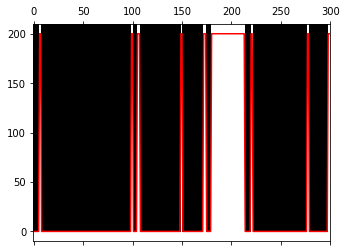

In [42]:
mat = np.zeros((len(h), len(h)))
for i in range(len(h)):
    mat[i,] = h
fig = plt.figure()
ax = fig.add_subplot(111)
ax.matshow(mat,cmap='gray')
ax.plot([i*200 for i in h], color='r')
ax.set_ylim(-10, 210)
plt.show()

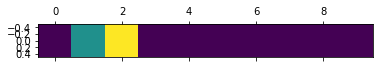

In [43]:
mat = [[1, 2, 3, 1, 1, 1, 1, 1, 1, 1]]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.matshow(mat)
plt.show()
